## Task C: Let's stay together, Circular orbit

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized #, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

First we have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$ (equal to zero since we're working with a circular orbit).

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e = 0               # we're in a circular orbit

part = ic_two_body(mass1, mass2, rp, e)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system.

In [3]:
a = rp / (1 - e)
M_tot = np.sum(part.mass)

P = np.sqrt((4 * np.pi**2. * a**3.)/(M_tot))
print(P)

40.55778675973612


The initial energy is:

Using the initial conditions we gave as input, the period is $P = 40.56$

### Evolution of the binary system

We have now to evolve the binary system from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration. 

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


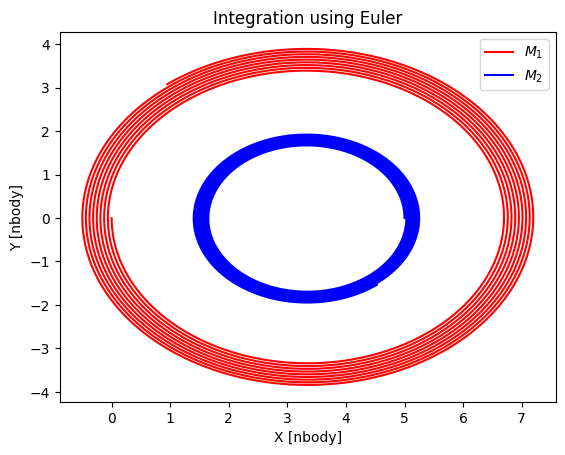

In [4]:
# euler
h = 0.01                    # timestep
tsimulation = 10*P          # end of the simulation
N = 2                       # number of particles

t = 0                       # simulation current time

path_1 = []
path_2 = []
Etot_euler = []
Ekin_euler = []
Epot_euler = []

while t < tsimulation:
    for j in range(1,N):
        result = integrator_euler(part, h, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
        Etot_n, Ekin_n, Epot_n = updated_part.Etot()
        Etot_euler.append(Etot_n)
        Ekin_euler.append(Ekin_n)
        Epot_euler.append(Epot_n)

    t += h

path_1 = np.array(path_1)
path_2 = np.array(path_2)
Etot_euler = np.array(Etot_euler)
Ekin_euler = np.array(Ekin_euler)
Etot_euler = np.array(Epot_euler)


# PLOT


plt.title('Integration using Euler')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


In [5]:
Etot_0_euler, _, _ = part.Etot(softening=0.)
print(Etot_0_euler)

-0.17156966038364094


In [16]:
# TOTAL ENERGY ERROR EULER
Energy_error_euler = np.zeros_like(Etot_euler)

for i in range(len(Etot_euler)):
    Energy_error_euler[i] = np.abs((Etot_euler[i] - Etot_0_euler)/Etot_0_euler)


Let us now calculate the Energy and plot it as a function of time

In [7]:
#Snapshots = np.arange(0, tsimulation, tstep)
#plt.title('Etot(t) for Euler')
#plt.plot(Energy_euler, Snapshots, label=f'$E_{tot}$', color='red')
#plt.xlabel('t')
#plt.ylabel('Etot')
#plt.legend()

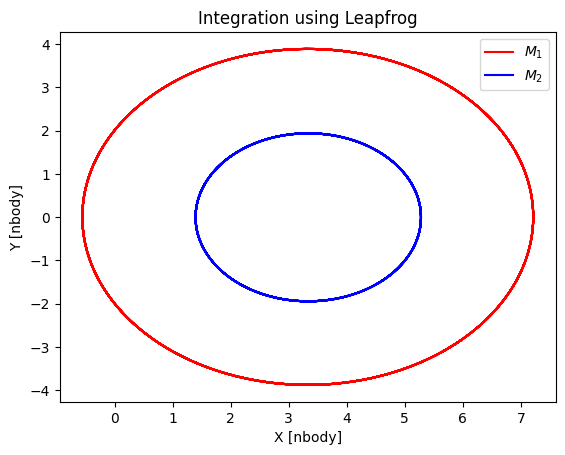

In [8]:
# leapfrog
h = 0.01                    # timestep
tsimulation = 10*P          # end of the simulation
N = 2                       # number of particles

t = 0                       # simulation current time

path_1 = []
path_2 = []
Etot_leapfrog = []
Ekin_leapfrog = []
Epot_leapfrog = []

while t < tsimulation:
    for j in range(1,N):
        result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
        Etot_n, Ekin_n, Epot_n = updated_part.Etot()
        Etot_leapfrog.append(Etot_n)
        Ekin_leapfrog.append(Ekin_n)
        Epot_leapfrog.append(Epot_n)
        

    t += h

path_1 = np.array(path_1)
path_2 = np.array(path_2)
Etot_leapfrog = np.array(Etot_leapfrog)
Ekin_leapfrog = np.array(Ekin_leapfrog)
Epot_leapfrog = np.array(Epot_leapfrog)

# PLOT 
plt.title('Integration using Leapfrog')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()


In [9]:
Etot_0_leapfrog, _, _ = part.Etot(softening=0.)
print(Etot_0_leapfrog)

-0.17156966040910665


In [10]:
# TOTAL ENERGY ERROR LEAPFROG

Energy_error_leapfrog = np.zeros_like(Etot_leapfrog)

for i in range(len(Etot_leapfrog)):
    Energy_error_leapfrog[i] = np.abs((Etot_leapfrog[i] - Etot_0_leapfrog)/Etot_0_leapfrog)

In [11]:
'''
# Runge-Kutta
h = 0.001                    # timestep
tsimulation = 10*P          # end of the simulation
N = 2                       # number of particles

t = 0                       # simulation current time

path_1 = []
path_2 = []

while t < tsimulation:
    for j in range(1,N):
        result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
        updated_part, tstep, updated_acc, _, _ = result
        path_1.append(updated_part.pos[0])
        path_2.append(updated_part.pos[1])
        

    t += h

path_1 = np.array(path_1)
path_2 = np.array(path_2)

# PLOT 
plt.title('Integration using Runge-Kutta')
plt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')
plt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()
'''

"\n# Runge-Kutta\nh = 0.001                    # timestep\ntsimulation = 10*P          # end of the simulation\nN = 2                       # number of particles\n\nt = 0                       # simulation current time\n\npath_1 = []\npath_2 = []\n\nwhile t < tsimulation:\n    for j in range(1,N):\n        result = integrator_rungekutta(part, h, acceleration_direct_vectorized)\n        updated_part, tstep, updated_acc, _, _ = result\n        path_1.append(updated_part.pos[0])\n        path_2.append(updated_part.pos[1])\n        \n\n    t += h\n\npath_1 = np.array(path_1)\npath_2 = np.array(path_2)\n\n# PLOT \nplt.title('Integration using Runge-Kutta')\nplt.plot(path_1[:,0], path_1[:,1], label=f'$M_1$', color='red')\nplt.plot(path_2[:,0], path_2[:,1], label=f'$M_2$', color='blue')\nplt.xlabel('X [nbody]')\nplt.ylabel('Y [nbody]')\nplt.legend()\n"

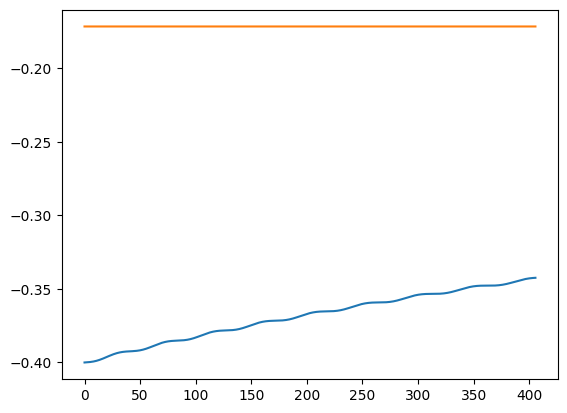

In [12]:
time = np.arange(0,tsimulation,h)

plt.plot(time, Etot_euler)
plt.plot(time, Etot_leapfrog)

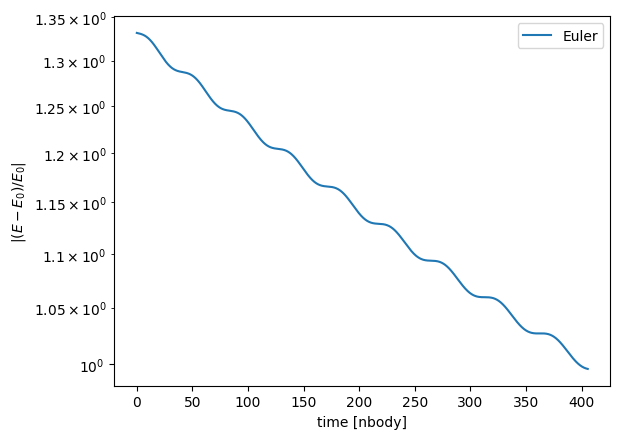

In [17]:
time = np.arange(0,tsimulation,h)

plt.plot(time, Energy_error_euler, label='Euler')
#plt.plot(time, Energy_error_leapfrog, label='Leapfrog')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()

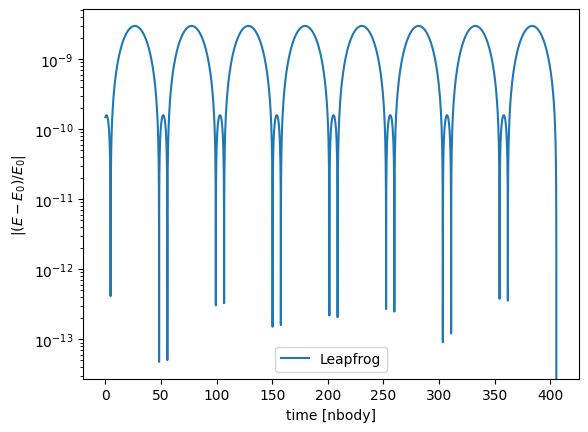

In [18]:
time = np.arange(0,tsimulation,h)

#plt.plot(time, Energy_error_euler, label='Euler')
plt.plot(time, Energy_error_leapfrog, label='Leapfrog')
plt.yscale('log')
plt.xlabel('time [nbody]')
plt.ylabel(f'$|(E-E_0)/E_0|$')
plt.legend()